# Intro data science - portfolio assignment 14: Bivariate analysis categorical vs categorical students performance dataset

Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.

- Do you expect there to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- DO a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [27]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [28]:
students = pd.read_csv('datasets/StudentsPerformance.csv')

students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Gender vs preparation course completed

To be honest, I am expecting female students to be more prepared for the tests.

In [29]:
cont1 = students.groupby(['gender', 'test preparation course']).size().unstack('gender', fill_value=0)

cont1

gender,female,male
test preparation course,,
completed,184,174
none,334,308


<AxesSubplot:xlabel='test preparation course'>

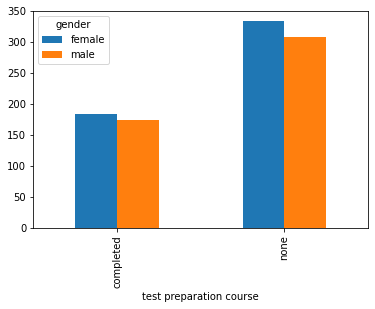

In [30]:
cont1.plot(kind='bar')

In [31]:
chi2_contingency(cont1)

(0.015529201882465886,
 0.9008273880804724,
 1,
 array([[185.444, 172.556],
        [332.556, 309.444]]))

Looks like I was wrong. There seemsto be a 90% chance of there being no correlation between gender and whether the preparation course was completed or not. In the contingency table, we can see that more females have completed the course, but there are also more females who have NOT completed the course. This is because there are more female than male students in this dataset.

## Gender vs lunch

I'm not expecting a correlation between gender and the type of lunch.

In [33]:
cont2 = students.groupby(['gender', 'lunch']).size().unstack('gender', fill_value=0)

cont2

gender,female,male
lunch,,
free/reduced,189,166
standard,329,316


<AxesSubplot:xlabel='lunch'>

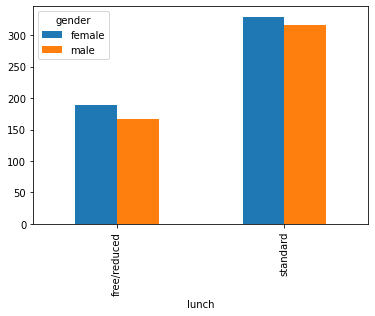

In [34]:
cont2.plot(kind='bar')

In [35]:
chi2_contingency(cont2)

(0.37173802316040705,
 0.5420584175146086,
 1,
 array([[183.89, 171.11],
        [334.11, 310.89]]))

The chance of there being no correlation is 54% in this case. Very interesting, as the bar plot looks almost identical to the one in the gender vs preparation course completed analysis. I wonder why this is the case.

## Lunch vs preparation course completed

A pointless analyses in my opinion, but let's see what the outcome will be!

In [36]:
cont3 = students.groupby(['lunch', 'test preparation course']).size().unstack('lunch', fill_value=0)

cont3

lunch,free/reduced,standard
test preparation course,,
completed,131,227
none,224,418


<AxesSubplot:xlabel='test preparation course'>

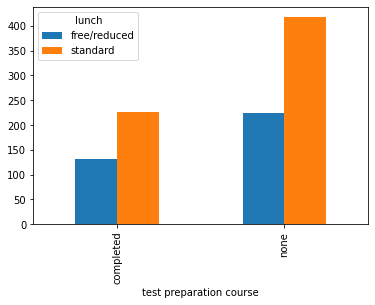

In [37]:
cont3.plot(kind='bar')

In [38]:
chi2_contingency(cont3)

(0.22095439044844808,
 0.6383136809999865,
 1,
 array([[127.09, 230.91],
        [227.91, 414.09]]))

Fairly expected result. I doubt the type of lunch would impact whether the student has completed the preparation course or not.